In [1]:
%load_ext autoreload
%autoreload 2

import activations

Activations = activations.Activations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from itertools import combinations

from gtda.diagrams import PairwiseDistance

In [3]:
basepath = '../../trained_models/'
file = '10kbatches/steps_20_batch_200_RNN_512_relu_rf_012_DoG_True_plane_lr_00001_weight_decay_00001/activations.npy'
path = basepath + file

In [4]:
ratemaps = np.load(path)

In [5]:
activations = Activations(ratemaps)

In [6]:
sacs = activations.calculate_sacs()

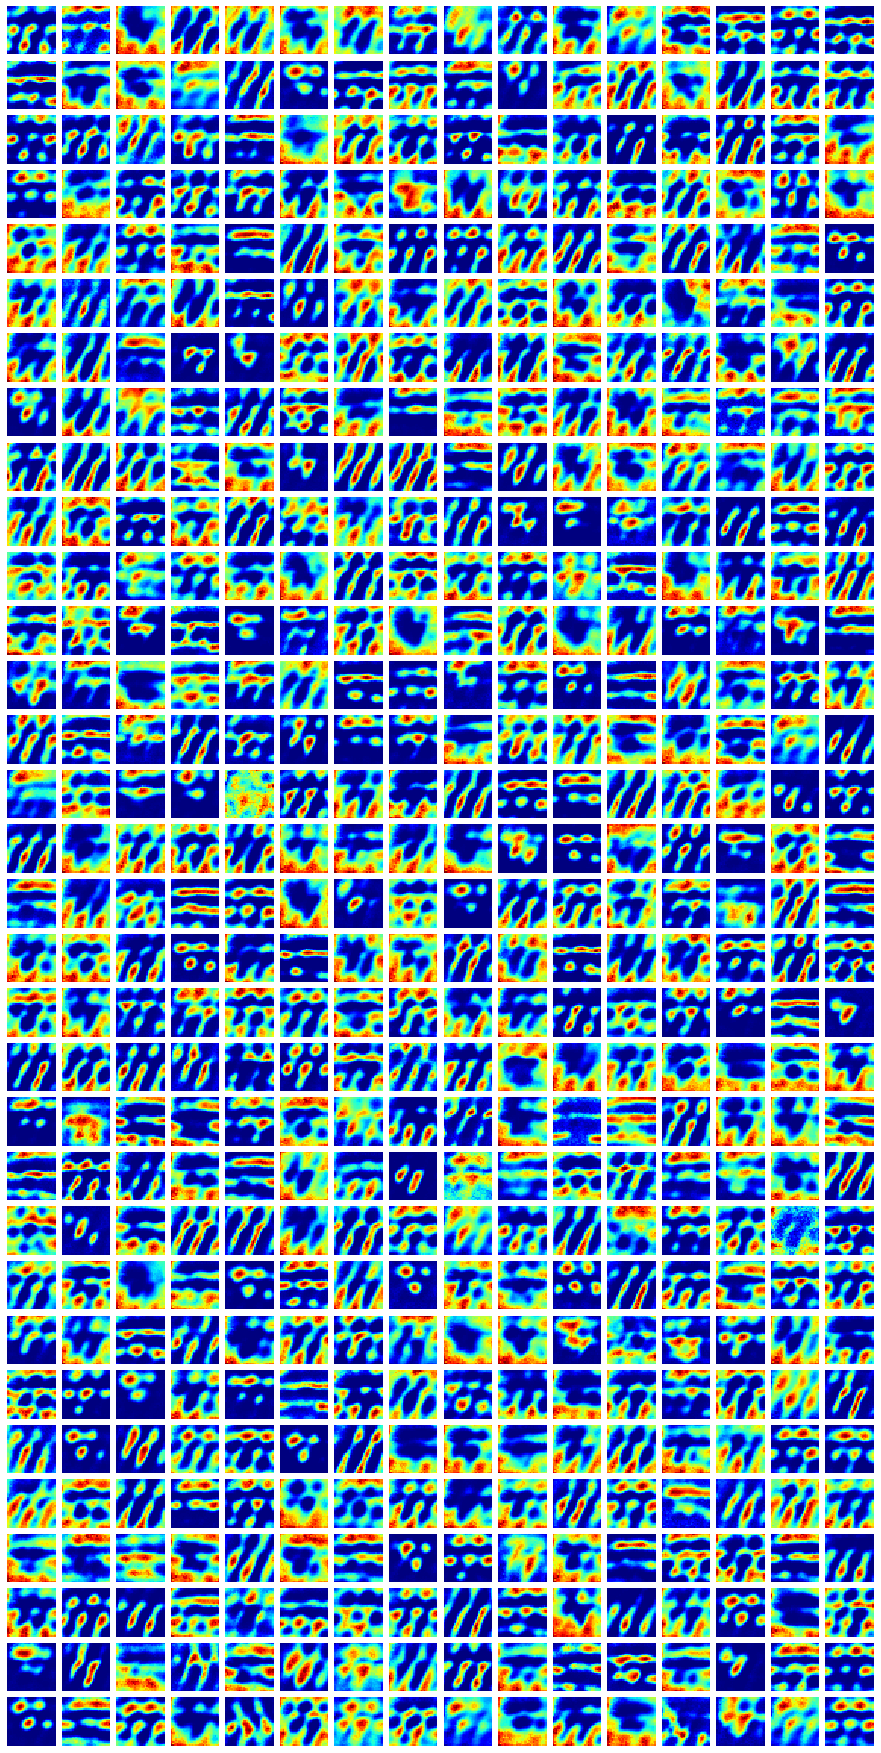

In [7]:
activations.vizall(activations.ratemaps_)

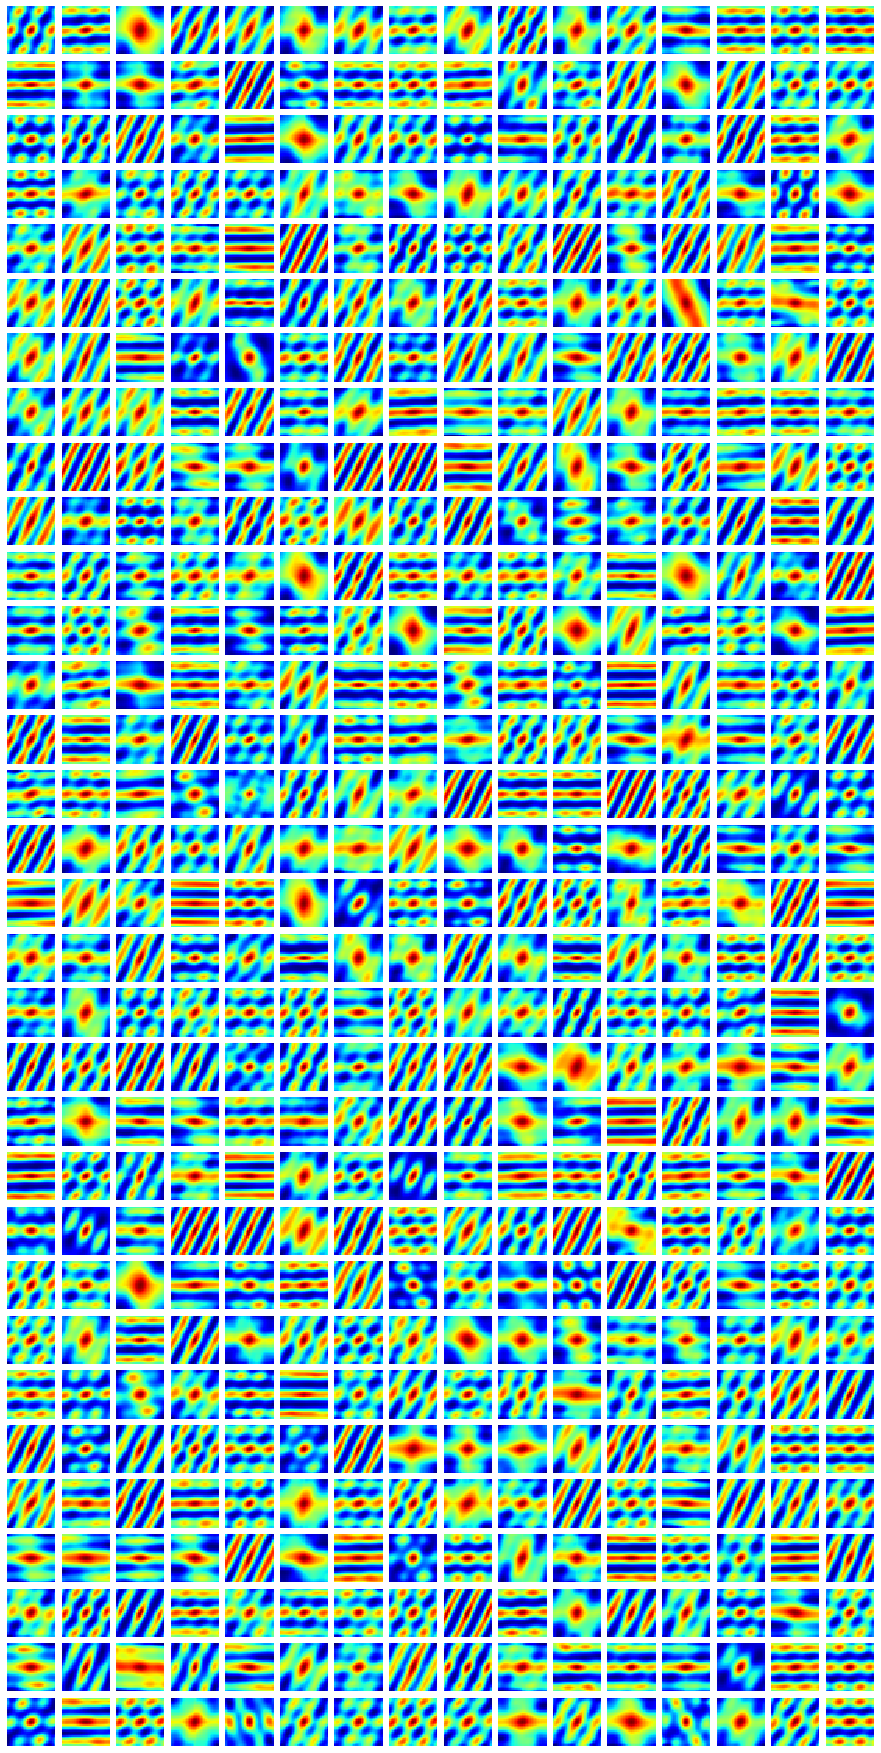

In [8]:
activations.vizall(activations.sacs_)

In [9]:
dgms = activations.calculate_dgms(digits=2)

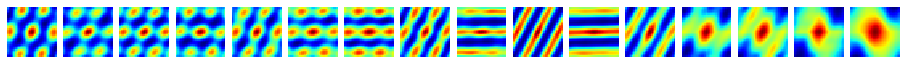

In [10]:
idxs = [62,239,72,32,0,14,511,9,16,20,36,137,341,8,5,2]
dgmsample = dgms[idxs]
activations.vizall(sacs[idxs])

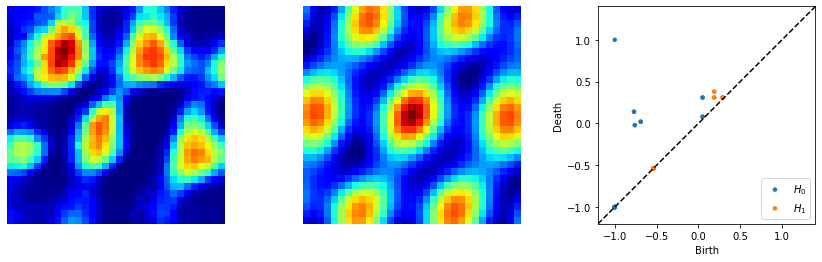

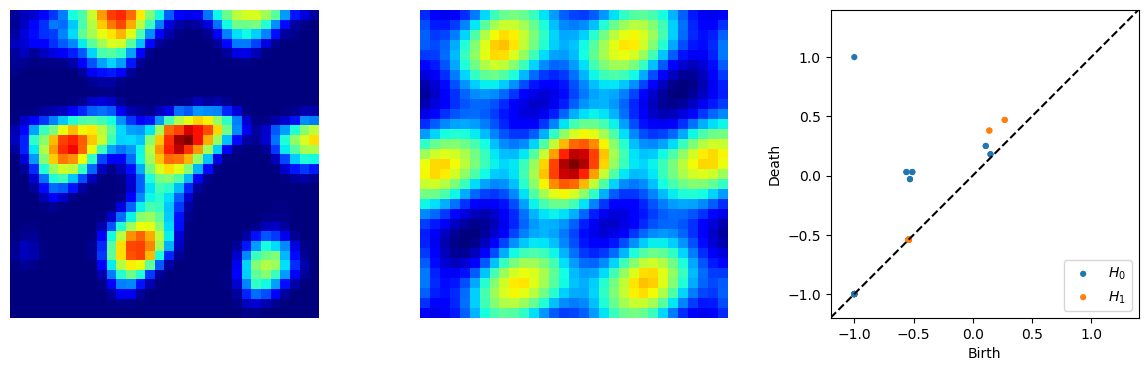

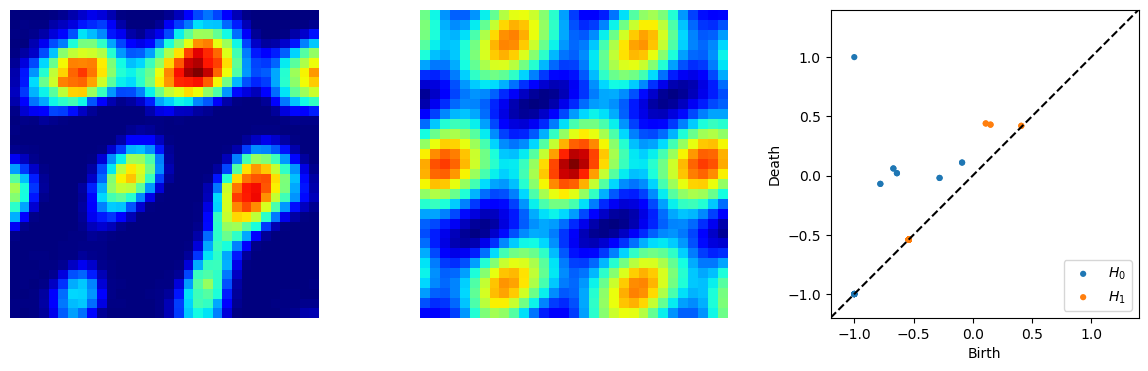

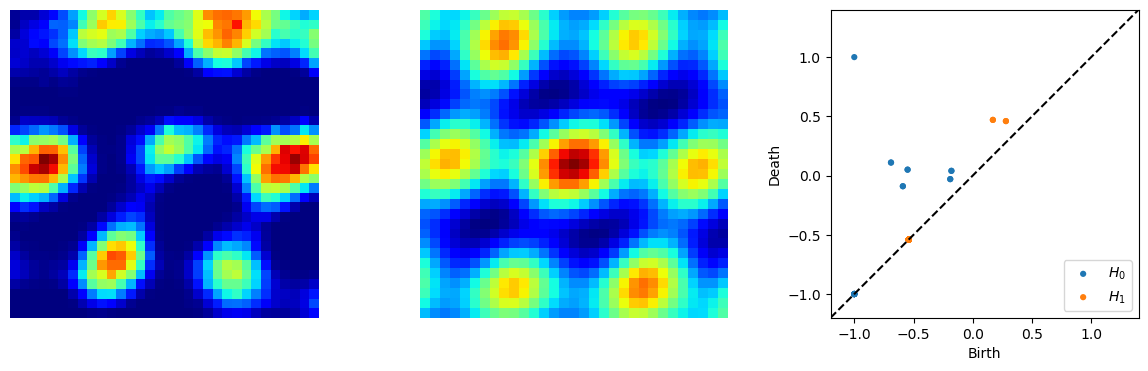

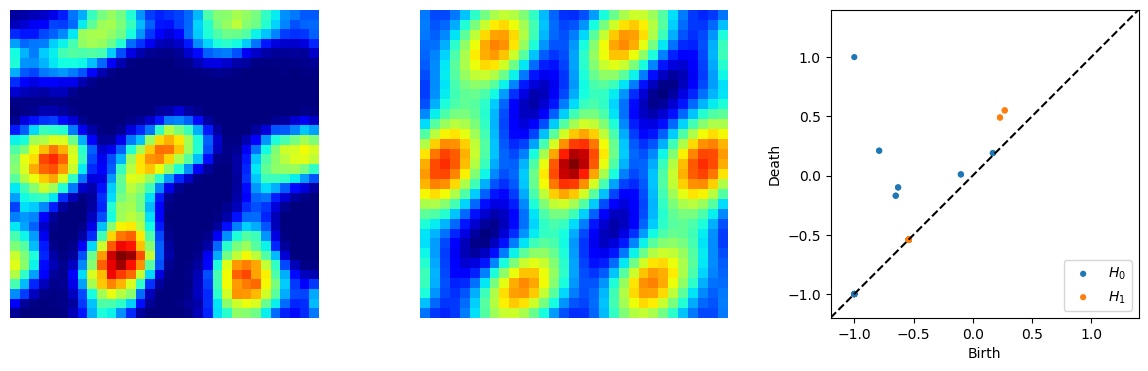

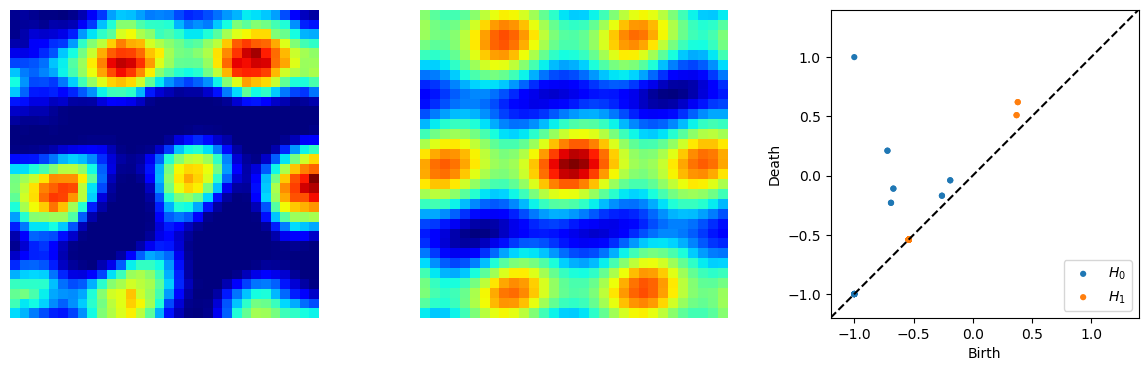

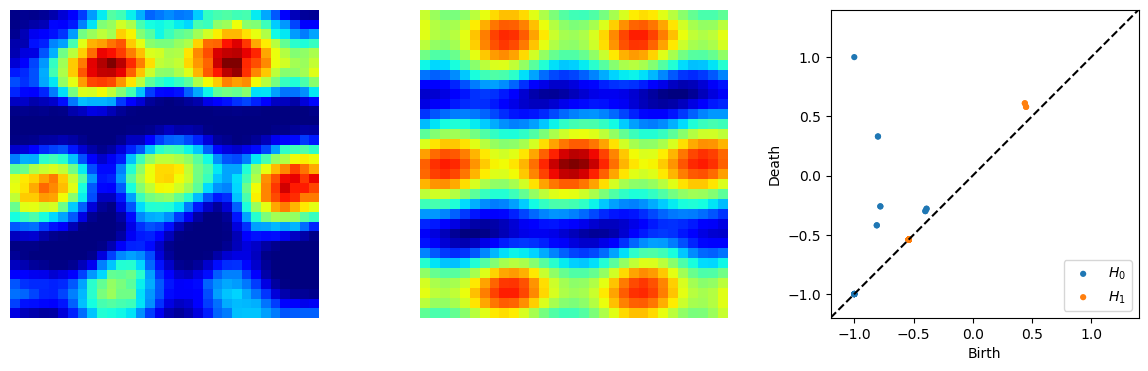

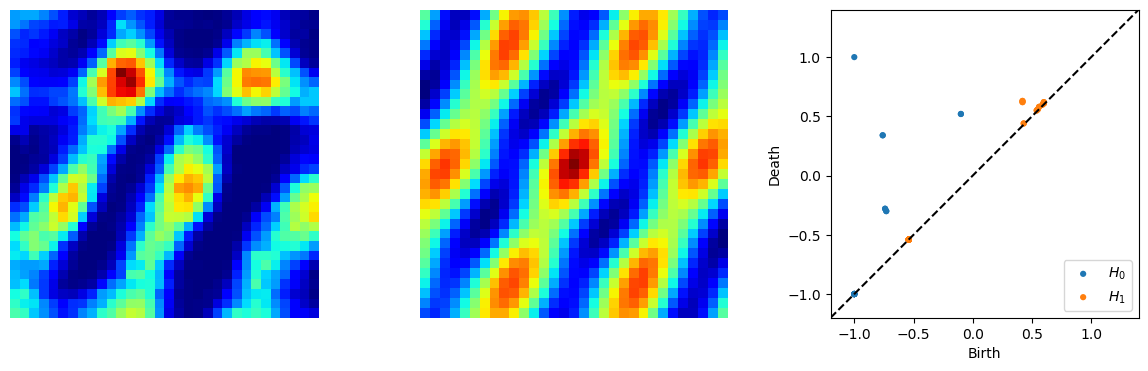

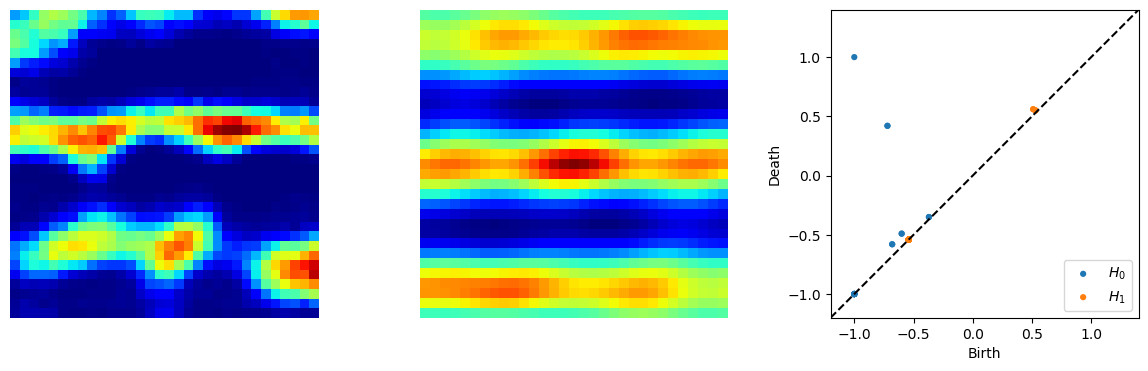

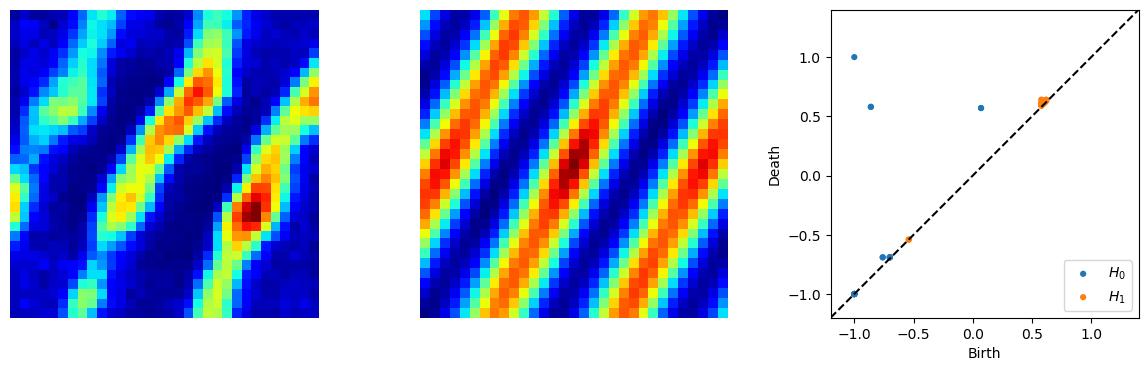

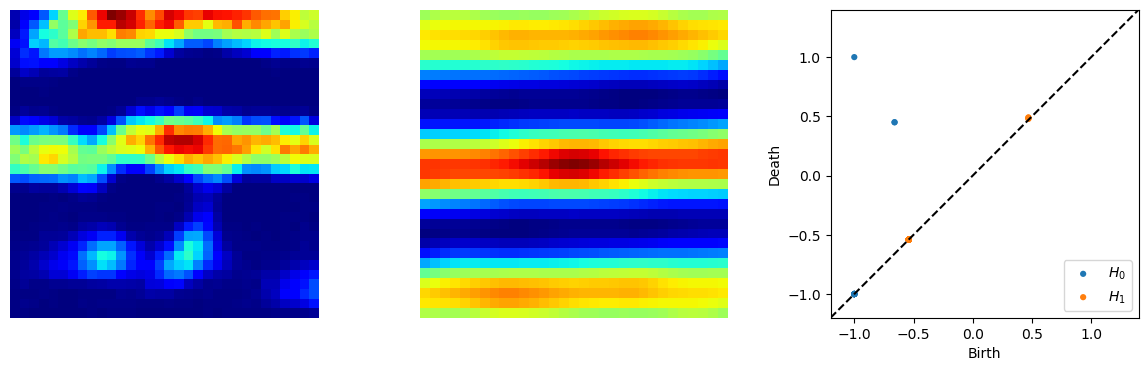

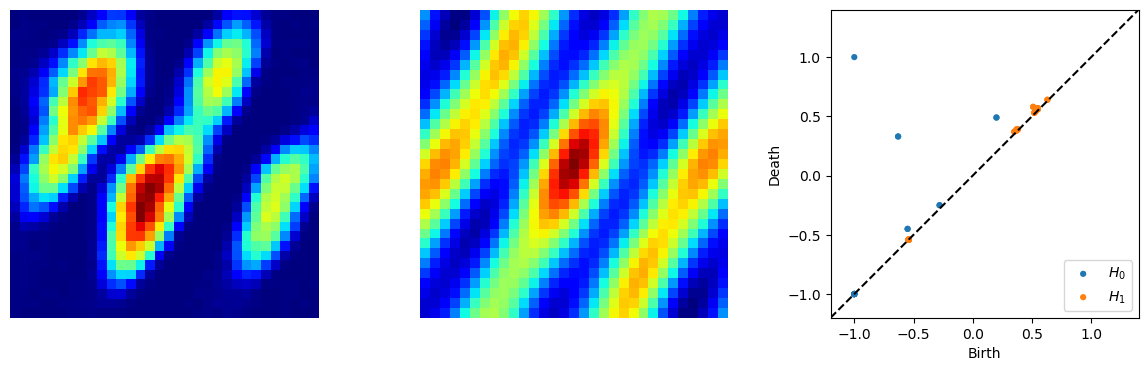

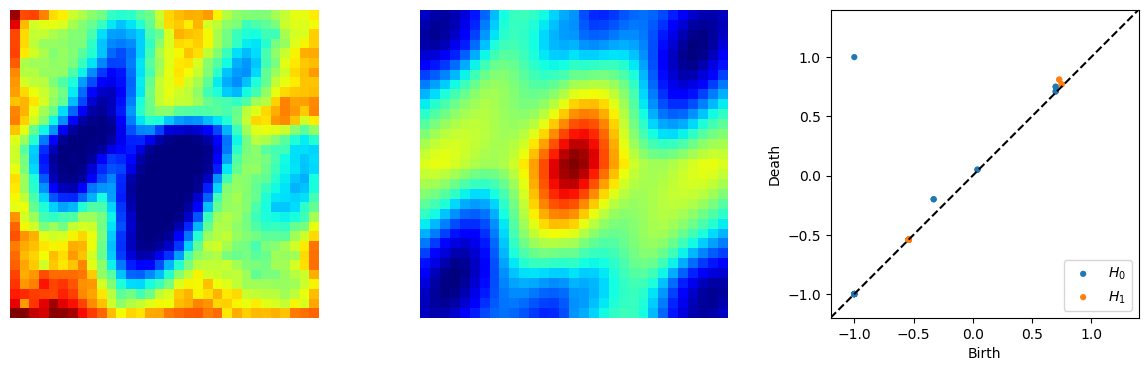

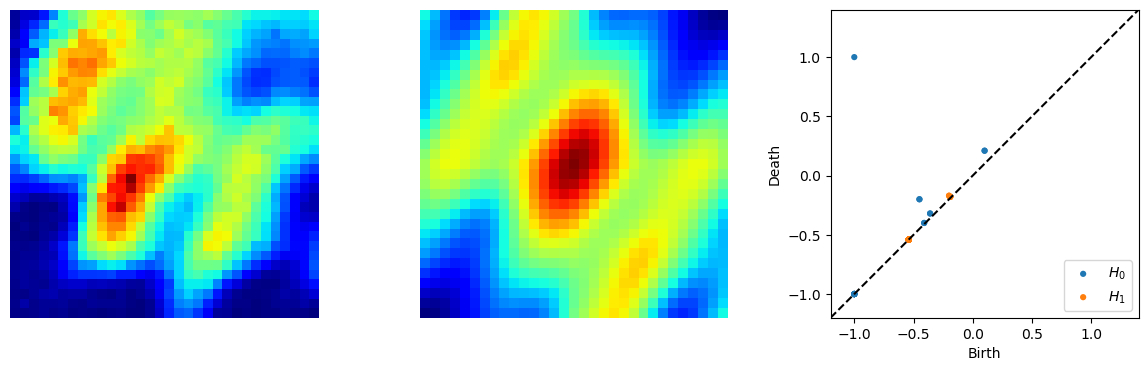

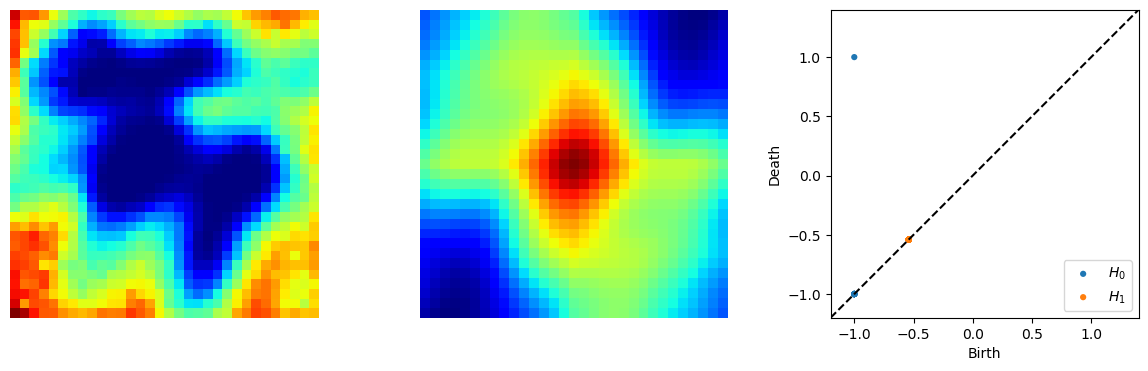

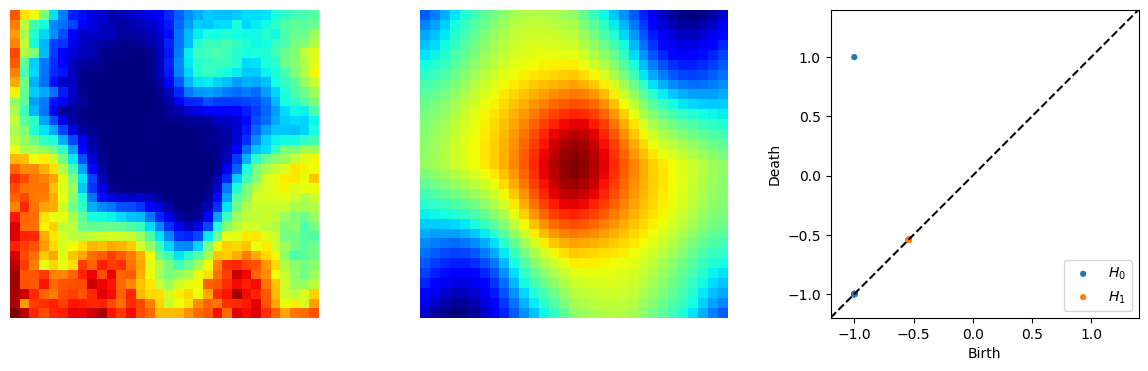

In [11]:
for idx in idxs:
    activations.plot_rm_sac_dgm(idx)

In [12]:
score60, order = activations.scores(ratemaps = ratemaps[idxs])

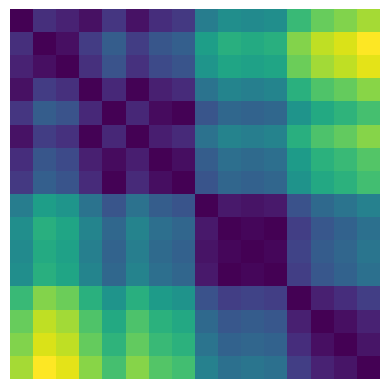

In [13]:
Dscore = np.zeros((16,16))
for i,j in combinations(range(16),2):
    Dscore[i,j] = abs(score60[i]-score60[j])

plt.imshow(Dscore+Dscore.T)
plt.axis('off');

In [14]:
import distances

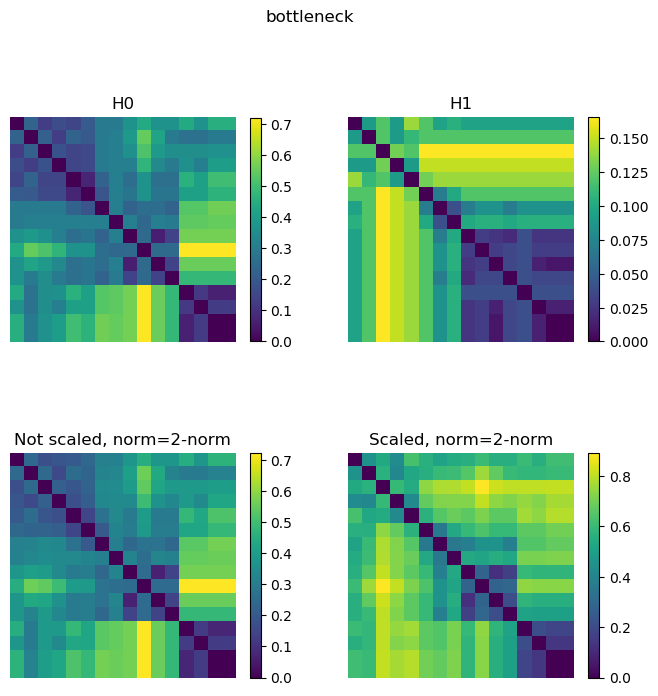

In [15]:
distances.distance_matrices_ext(dgmsample, 'bottleneck', {'delta':0})

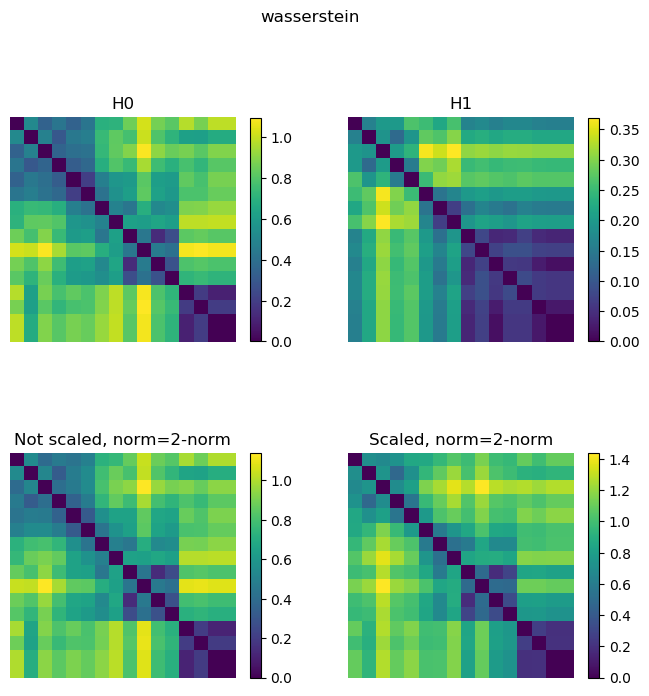

In [16]:
distances.distance_matrices_ext(dgmsample,'wasserstein',metric_params={'p':2})

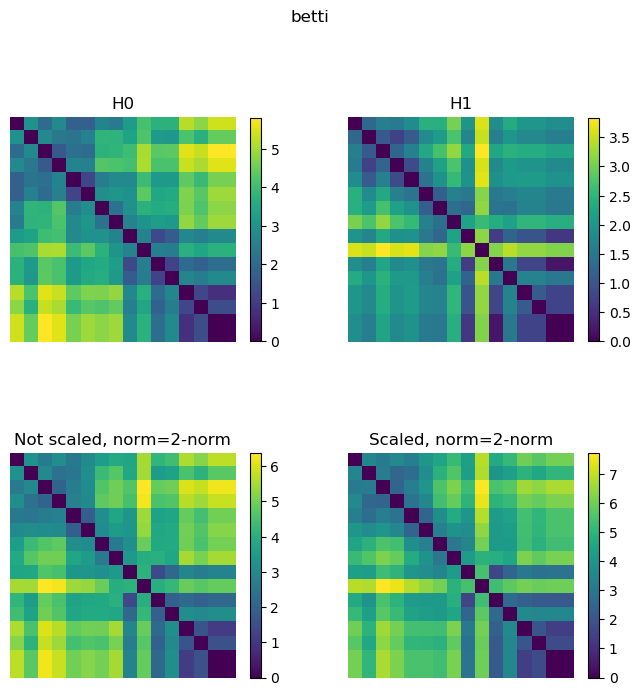

In [17]:
distances.distance_matrices_ext(dgmsample,'betti')

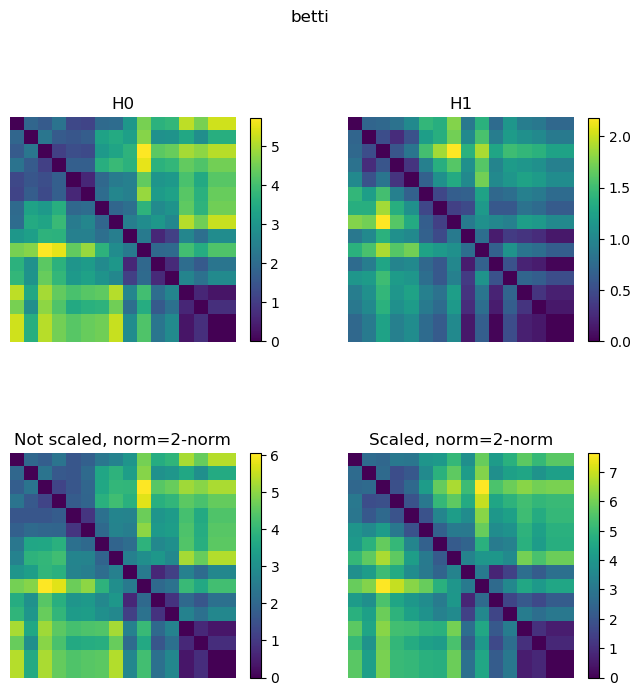

In [18]:
distances.distance_matrices_ext(dgmsample, 'betti', metric_params={'p':1})

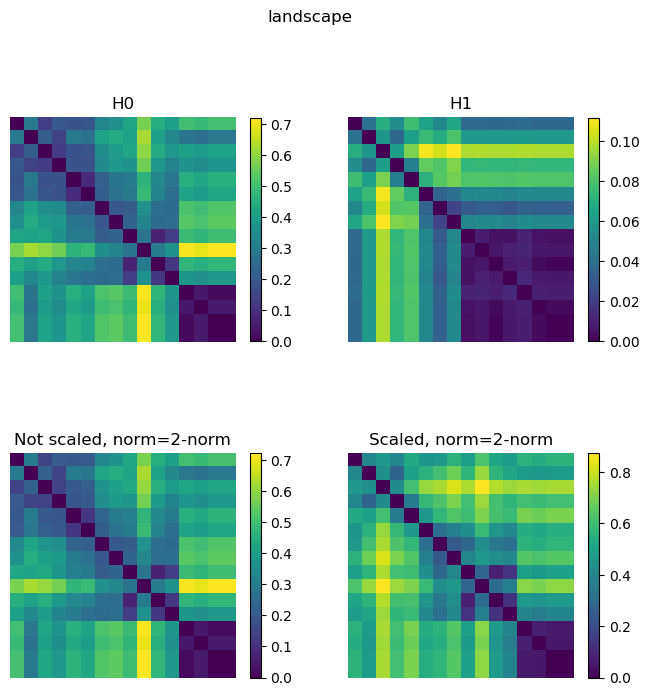

In [19]:
distances.distance_matrices_ext(dgmsample,'landscape',metric_params={'n_layers':7})

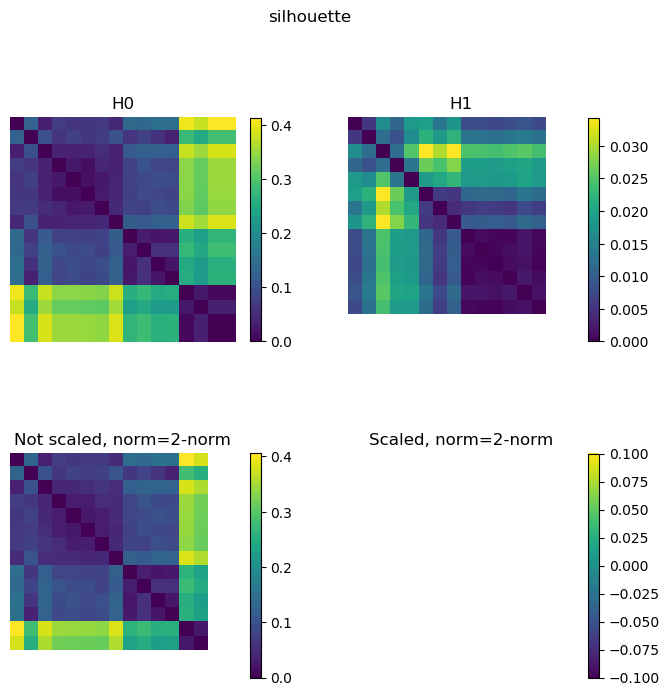

In [20]:
distances.distance_matrices_ext(dgmsample,metric='silhouette',metric_params={'p':1})

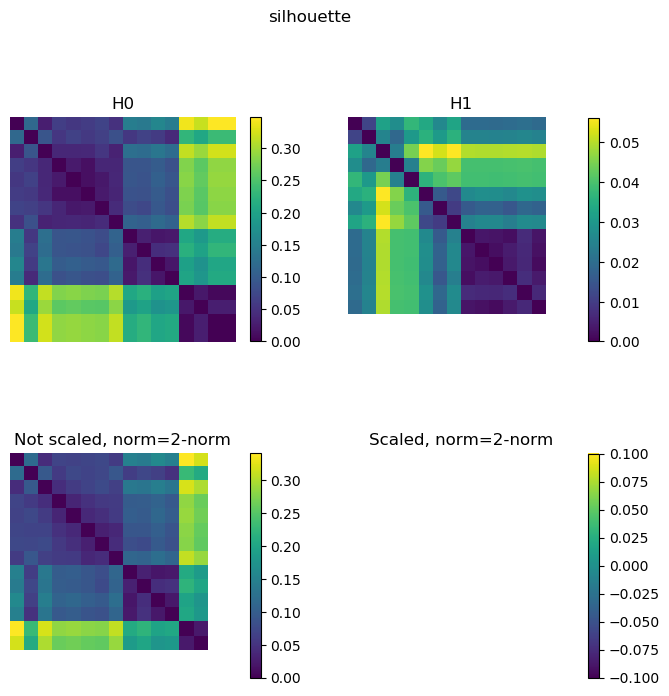

In [21]:
distances.distance_matrices_ext(dgmsample,metric='silhouette',metric_params={'p':2})

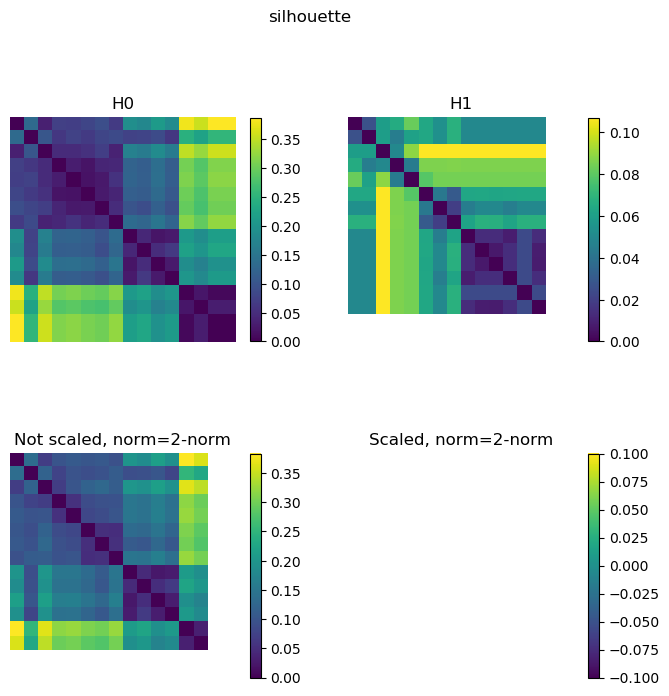

In [22]:
distances.distance_matrices_ext(dgmsample,metric='silhouette',metric_params={'p':10})

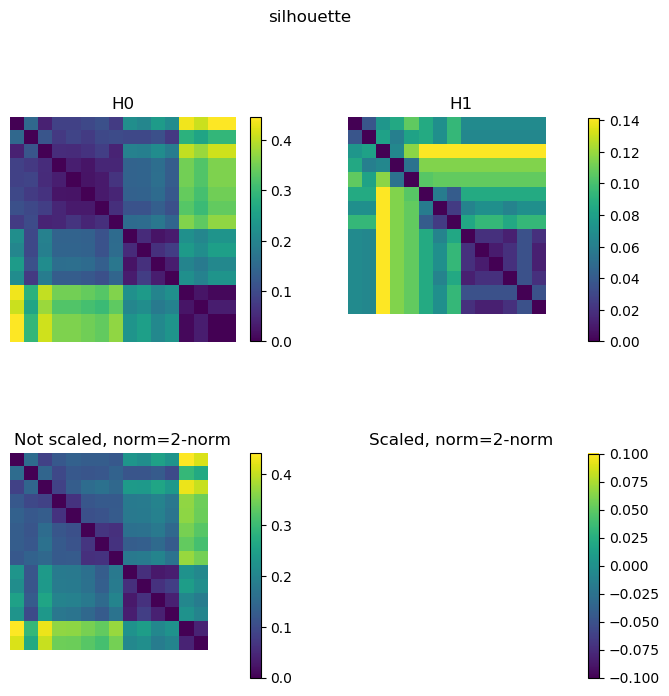

In [33]:
distances.distance_matrices_ext(dgmsample,metric='silhouette',metric_params={'p':100})

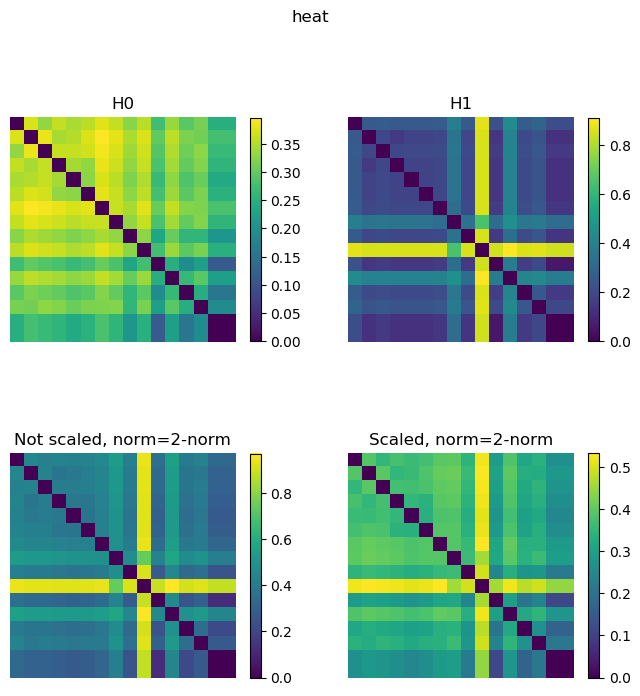

In [23]:
distances.distance_matrices_ext(dgmsample,metric='heat')

In [24]:
score60, idxst = activations.scores()

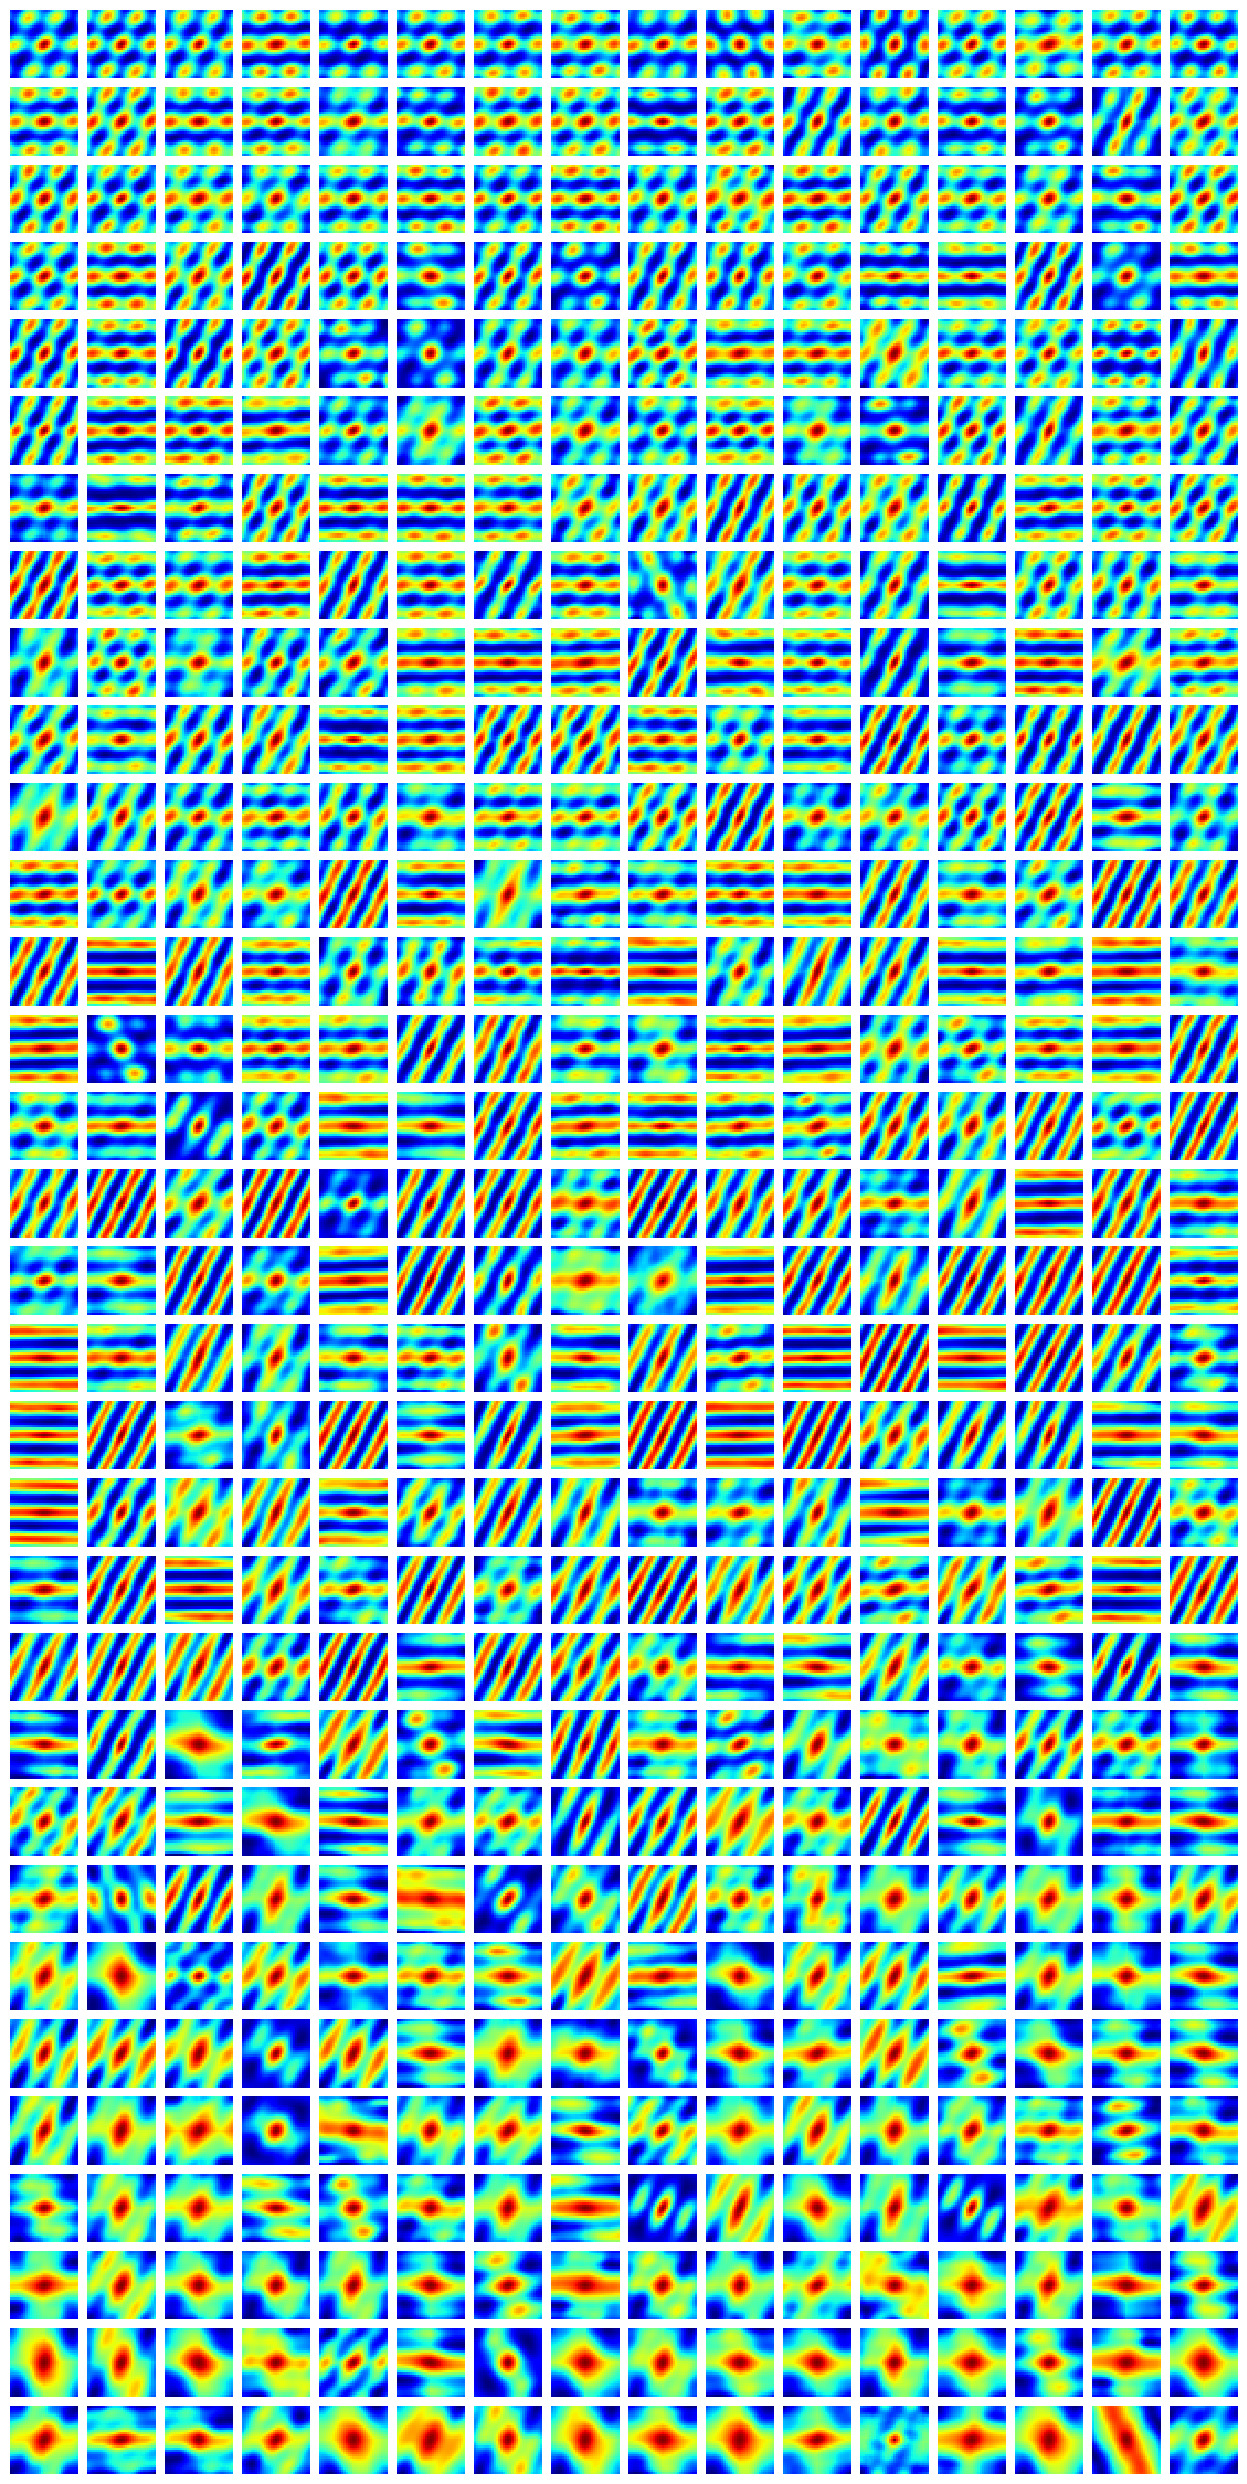

In [25]:
activations.vizall(sacs[idxst])

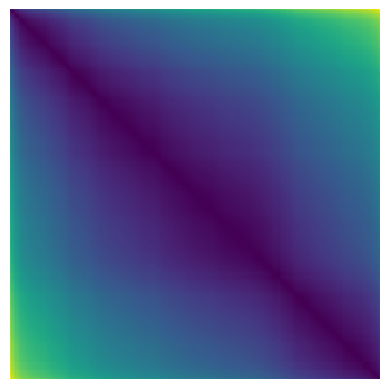

In [26]:
score = (np.array(score60))[idxst]
Dsc = np.zeros((512,512))
for i,j in combinations(range(512),2):
    Dsc[i,j] = abs(score[i]-score[j])

plt.imshow(Dsc+Dsc.T)
plt.axis('off');